In [1]:
import numpy as np
import pandas as pd

In [12]:
df_train = pd.read_csv("../data/raw/application_train.csv.zip")
df_test = pd.read_csv("../data/raw/application_test.csv.zip")

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
corr_rank = df_train.corr()['TARGET'].sort_values()
corr_rank.head(n=15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
Name: TARGET, dtype: float64

In [14]:
train = df_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DEF_30_CNT_SOCIAL_CIRCLE']]
test = df_test[['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DEF_30_CNT_SOCIAL_CIRCLE']]
train

,TARGET,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE
0,1,0.139376,0.083037,0.262949,-637,-9461,2,2,-1134.0,-2120,2.0
1,0,NaN,0.311267,0.622246,-1188,-16765,1,1,-828.0,-291,0.0
2,0,0.729567,NaN,0.555912,-225,-19046,2,2,-815.0,-2531,0.0
3,0,NaN,NaN,0.650442,-3039,-19005,2,2,-617.0,-2437,0.0
4,0,NaN,NaN,0.322738,-3038,-19932,2,2,-1106.0,-3458,0.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,0,NaN,0.145570,0.681632,-236,-9327,1,1,-273.0,-1982,0.0
307507,0,NaN,NaN,0.115992,365243,-20775,2,2,0.0,-4090,0.0
307508,0,0.218859,0.744026,0.535722,-7921,-14966,3,3,-1909.0,-5150,0.0
307509,1,0.661024,NaN,0.514163,-4786,-11961,2,2,-322.0,-931,0.0


In [15]:
test

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE
0,0.159520,0.752614,0.789654,-2329,-19241,2,2,-1740.0,-812,0.0
1,0.432962,0.564990,0.291656,-4469,-18064,2,2,0.0,-1623,0.0
2,0.610991,NaN,0.699787,-4458,-20038,2,2,-856.0,-3503,0.0
3,0.612704,0.525734,0.509677,-1866,-13976,2,2,-1805.0,-4208,0.0
4,NaN,0.202145,0.425687,-2191,-13040,2,2,-821.0,-4262,0.0
...,...,...,...,...,...,...,...,...,...,...
48739,0.643026,NaN,0.648575,-5169,-19970,3,3,-684.0,-3399,0.0
48740,NaN,NaN,0.684596,-1149,-11186,2,2,0.0,-3003,0.0
48741,0.283712,0.733503,0.632770,-3037,-15922,2,2,-838.0,-1504,0.0
48742,0.595456,0.373090,0.445701,-2731,-13968,2,2,-2308.0,-1364,0.0


In [16]:
train['TRAINING'] = True
test['TRAINING'] = False
y = train.TARGET
y

C:\Users\adrie\AppData\Local\Temp/ipykernel_3804/1356374090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TRAINING'] = True
C:\Users\adrie\AppData\Local\Temp/ipykernel_3804/1356374090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TRAINING'] = False


0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [17]:
train.drop(columns = 'TARGET', inplace=True)
x = pd.concat([train, test], axis = 0)
x.DAYS_EMPLOYED.describe()

c:\Users\adrie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

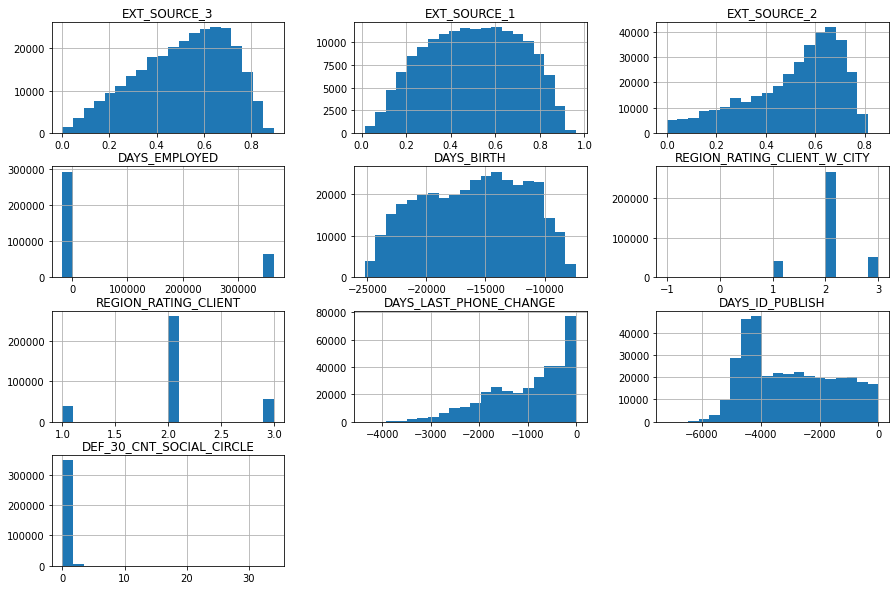

In [18]:
x.hist(figsize = (15,10), bins = 20);


In [19]:
x.nunique()


EXT_SOURCE_3                      814
EXT_SOURCE_1                   134315
EXT_SOURCE_2                   127157
DAYS_EMPLOYED                   12896
DAYS_BIRTH                      17467
REGION_RATING_CLIENT_W_CITY         4
REGION_RATING_CLIENT                3
DAYS_LAST_PHONE_CHANGE           3846
DAYS_ID_PUBLISH                  6224
DEF_30_CNT_SOCIAL_CIRCLE           10
TRAINING                            2
dtype: int64

In [20]:
skew_list = x.skew()
skew_list

EXT_SOURCE_3                  -0.398628
EXT_SOURCE_1                  -0.077242
EXT_SOURCE_2                  -0.793076
DAYS_EMPLOYED                  1.652128
DAYS_BIRTH                    -0.115918
REGION_RATING_CLIENT_W_CITY    0.052475
REGION_RATING_CLIENT           0.081122
DAYS_LAST_PHONE_CHANGE        -0.711807
DAYS_ID_PUBLISH                0.338329
DEF_30_CNT_SOCIAL_CIRCLE       8.111785
TRAINING                      -2.113585
dtype: float64

In [21]:
cols_to_scale = x.select_dtypes(exclude = ['object', 'bool']).columns.values.tolist()
cols_to_scale

['EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'DEF_30_CNT_SOCIAL_CIRCLE']

In [22]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler
robust_scaler = RobustScaler().fit(x[cols_to_scale])
standard_scaler = StandardScaler().fit(x[cols_to_scale])
minmax_scaler = MinMaxScaler().fit(x[cols_to_scale])

In [23]:
x[cols_to_scale] = robust_scaler.transform(x[cols_to_scale])
x

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,TRAINING
0,-1.327464,-1.252419,-1.126607,0.235648,0.868018,0.0,0.0,-0.277948,0.435217,2.0,True
1,NaN,-0.576862,0.214188,0.014452,-0.139291,-1.0,-1.0,-0.043645,1.138408,0.0,True
2,0.660472,NaN,-0.033351,0.401044,-0.453868,0.0,0.0,-0.033691,0.277201,0.0,True
3,NaN,NaN,0.319407,-0.728623,-0.448214,0.0,0.0,0.117917,0.313341,0.0,True
4,NaN,NaN,-0.903489,-0.728222,-0.576058,0.0,0.0,-0.256508,-0.079200,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
48739,0.368976,NaN,0.312441,-1.583701,-0.581299,1.0,1.0,0.066616,-0.056517,0.0,False
48740,NaN,NaN,0.446860,0.030108,0.630120,0.0,0.0,0.590352,0.095732,0.0,False
48741,-0.841298,0.672947,0.253460,-0.727820,-0.023031,0.0,0.0,-0.051302,0.672049,0.0,False
48742,0.208749,-0.393868,-0.444627,-0.604978,0.246449,0.0,0.0,-1.176876,0.725875,0.0,False


In [ ]:
x = pd.get_dummies(x)
x

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,TRAINING
0,-1.327464,-1.252419,-1.126607,0.235648,0.868018,0.0,0.0,-0.277948,0.435217,2.0,True
1,NaN,-0.576862,0.214188,0.014452,-0.139291,-1.0,-1.0,-0.043645,1.138408,0.0,True
2,0.660472,NaN,-0.033351,0.401044,-0.453868,0.0,0.0,-0.033691,0.277201,0.0,True
3,NaN,NaN,0.319407,-0.728623,-0.448214,0.0,0.0,0.117917,0.313341,0.0,True
4,NaN,NaN,-0.903489,-0.728222,-0.576058,0.0,0.0,-0.256508,-0.079200,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
48739,0.368976,NaN,0.312441,-1.583701,-0.581299,1.0,1.0,0.066616,-0.056517,0.0,False
48740,NaN,NaN,0.446860,0.030108,0.630120,0.0,0.0,0.590352,0.095732,0.0,False
48741,-0.841298,0.672947,0.253460,-0.727820,-0.023031,0.0,0.0,-0.051302,0.672049,0.0,False
48742,0.208749,-0.393868,-0.444627,-0.604978,0.246449,0.0,0.0,-1.176876,0.725875,0.0,False


In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
imputer = IterativeImputer()
x.isna().sum()

EXT_SOURCE_3                    69633
EXT_SOURCE_1                   193910
EXT_SOURCE_2                      668
DAYS_EMPLOYED                       0
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
DAYS_LAST_PHONE_CHANGE              1
DAYS_ID_PUBLISH                     0
DEF_30_CNT_SOCIAL_CIRCLE         1050
TRAINING                            0
dtype: int64

In [25]:
x = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)
x

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,TRAINING
0,-1.327464,-1.252419,-1.126607,0.235648,0.868018,0.0,0.0,-0.277948,0.435217,2.0,1.0
1,-0.381782,-0.576862,0.214188,0.014452,-0.139291,-1.0,-1.0,-0.043645,1.138408,0.0,1.0
2,0.660472,0.475703,-0.033351,0.401044,-0.453868,0.0,0.0,-0.033691,0.277201,0.0,1.0
3,0.021491,0.438632,0.319407,-0.728623,-0.448214,0.0,0.0,0.117917,0.313341,0.0,1.0
4,0.003271,0.414266,-0.903489,-0.728222,-0.576058,0.0,0.0,-0.256508,-0.079200,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
356250,0.368976,0.438520,0.312441,-1.583701,-0.581299,1.0,1.0,0.066616,-0.056517,0.0,0.0
356251,-0.229323,-0.324650,0.446860,0.030108,0.630120,0.0,0.0,0.590352,0.095732,0.0,0.0
356252,-0.841298,0.672947,0.253460,-0.727820,-0.023031,0.0,0.0,-0.051302,0.672049,0.0,0.0
356253,0.208749,-0.393868,-0.444627,-0.604978,0.246449,0.0,0.0,-1.176876,0.725875,0.0,0.0


In [26]:
x.isna().sum().sum()

0

In [27]:
train = x[x['TRAINING'] == True]
test = x[x['TRAINING'] == False]
train.drop(columns = 'TRAINING', inplace=True)
test.drop(columns = 'TRAINING', inplace=True)

c:\Users\adrie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(train, y, test_size = .3, random_state = 7)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(xtrain, ytrain)

In [30]:
clf.score(xtest, ytest)

0.9192446939970083

In [32]:
import joblib

joblib_file = "../models/Gradient_boosting_model.pkl"
joblib.dump(clf,joblib_file)

['../models/Gradient_boosting_model.pkl']